<a href="https://colab.research.google.com/github/matsu641/audio_controller/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

# ソフトバンクグループ（東証：9984）
df = yf.download("9984.T", start="2010-01-01", end="2025-03-25")

# 調整後終値（株式分割や配当を反映）
df = df.rename(columns={"Adj Close": "Close"})

df.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,9984.T,9984.T,9984.T,9984.T,9984.T
Date,,,,,
2025-03-17,7979.0,8055.0,7962.0,7980.0,5880500
2025-03-18,7964.0,8133.0,7950.0,8105.0,6263800
2025-03-19,7807.0,7919.0,7807.0,7884.0,6232700
2025-03-21,7960.0,8040.0,7900.0,7901.0,7281000
2025-03-24,8199.0,8225.0,8044.0,8050.0,7957500




*   Close（終値）
*   High（高値）
*   Low（安値）
*   Open（始値）
*   Volume（出来高）


In [ ]:
# 列の階層（MultiIndex）をフラットにする
df.columns = df.columns.droplevel(1)  # 「Price」などの上位層を消す
df.columns.name = None                # 列名の名前もリセット
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df = df.sort_values(by="Date", ascending=True)

In [ ]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,978.693726,981.392330,973.746285,975.995122,3383800
2010-01-05,980.492554,989.038131,977.793950,986.339528,6214800
2010-01-06,984.090698,989.487905,977.793957,980.492560,5451800
2010-01-07,987.689026,1000.282511,981.392283,981.842051,6889600
2010-01-08,980.492554,998.483243,968.348839,988.588364,7708400


In [ ]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# データの基本情報を確認
print(df.info())  # データ型の確認
print(df.describe())  # 統計情報の確認
print(df.head())  # 先頭のデータ確認
print(df.tail())  # 末尾のデータ確認

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3743 entries, 2010-01-04 to 2025-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3743 non-null   float64
 1   High    3743 non-null   float64
 2   Low     3743 non-null   float64
 3   Open    3743 non-null   float64
 4   Volume  3743 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 175.5 KB
None
              Close          High           Low          Open        Volume
count   3743.000000   3743.000000   3743.000000   3743.000000  3.743000e+03
mean    4227.081146   4281.784101   4175.991712   4227.841908  1.580118e+07
std     2321.405172   2353.717183   2292.398950   2322.413445  1.035952e+07
min      927.702271    933.562412    900.204798    901.557134  0.000000e+00
25%     2697.121826   2745.408158   2648.484131   2693.350388  9.494100e+06
50%     4037.466553   4069.064116   3986.242711   4027.357883  1.313800e+07
75%     5489.982178   5556.1

In [ ]:
# データ型の確認
print(df.dtypes)


Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3743 entries, 2010-01-04 to 2025-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3743 non-null   float64
 1   High    3743 non-null   float64
 2   Low     3743 non-null   float64
 3   Open    3743 non-null   float64
 4   Volume  3743 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 175.5 KB
None
                 Close         High         Low        Open   Volume
Date                                                                
2010-01-04  978.693726   981.392330  973.746285  975.995122  3383800
2010-01-05  980.492554   989.038131  977.793950  986.339528  6214800
2010-01-06  984.090698   989.487905  977.793957  980.492560  5451800
2010-01-07  987.689026  1000.282511  981.392283  981.842051  6889600
2010-01-08  980.492554   998.483243  968.348839  988.588364  7708400


In [ ]:
df = df.reset_index()
df

,Date,Close,High,Low,Open,Volume
0,2010-01-04,978.693726,981.392330,973.746285,975.995122,3383800
1,2010-01-05,980.492554,989.038131,977.793950,986.339528,6214800
2,2010-01-06,984.090698,989.487905,977.793957,980.492560,5451800
3,2010-01-07,987.689026,1000.282511,981.392283,981.842051,6889600
4,2010-01-08,980.492554,998.483243,968.348839,988.588364,7708400
...,...,...,...,...,...,...
3738,2025-03-17,7979.000000,8055.000000,7962.000000,7980.000000,5880500
3739,2025-03-18,7964.000000,8133.000000,7950.000000,8105.000000,6263800
3740,2025-03-19,7807.000000,7919.000000,7807.000000,7884.000000,6232700
3741,2025-03-21,7960.000000,8040.000000,7900.000000,7901.000000,7281000


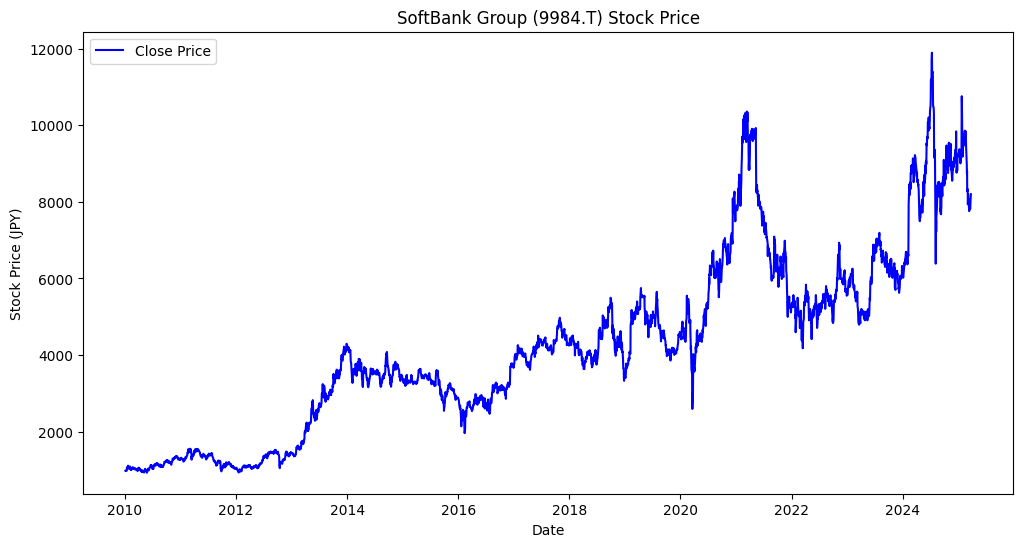

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (JPY)")
plt.title("SoftBank Group (9984.T) Stock Price")
plt.legend()
plt.show()

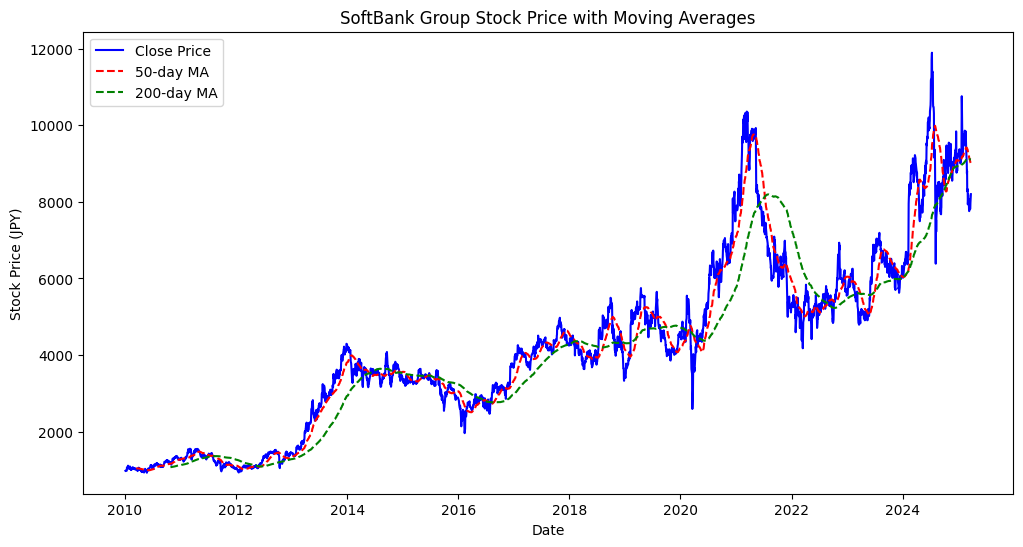

In [ ]:
df["MA_50"] = df["Close"].rolling(window=50).mean() #50日移動平均を計算
df["MA_200"] = df["Close"].rolling(window=200).mean() #200日移動平均を計算

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.plot(df["Date"], df["MA_50"], label="50-day MA", color="red", linestyle="dashed")
plt.plot(df["Date"], df["MA_200"], label="200-day MA", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price (JPY)")
plt.title("SoftBank Group Stock Price with Moving Averages")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume,MA_50,MA_200
0,2010-01-04,978.693726,981.392330,973.746285,975.995122,3383800,NaN,NaN
1,2010-01-05,980.492554,989.038131,977.793950,986.339528,6214800,NaN,NaN
2,2010-01-06,984.090698,989.487905,977.793957,980.492560,5451800,NaN,NaN
3,2010-01-07,987.689026,1000.282511,981.392283,981.842051,6889600,NaN,NaN
4,2010-01-08,980.492554,998.483243,968.348839,988.588364,7708400,NaN,NaN


In [ ]:
X = df[["Close", "MA_50", "MA_200"]].dropna()
X.shape

(3544, 3)

In [ ]:
y = df["Close"].shift(-1).dropna()
X = df[["Close", "MA_50", "MA_200"]].iloc[:-1]  # 最後の行を削除して y と一致
X

,Close,MA_50,MA_200
0,978.693726,NaN,NaN
1,980.492554,NaN,NaN
2,984.090698,NaN,NaN
3,987.689026,NaN,NaN
4,980.492554,NaN,NaN
...,...,...,...
3737,7836.000000,9132.44,9114.708743
3738,7979.000000,9109.84,9112.847312
3739,7964.000000,9084.04,9109.125310
3740,7807.000000,9056.48,9105.690647


In [ ]:
#データの 20% をテストデータ, 80% を訓練データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2993, 3)
X_test shape: (749, 3)
y_train shape: (2993,)
y_test shape: (749,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# 学習
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 予測
y_pred = model.predict(X_test)

In [ ]:
# 評価（MAE: 平均絶対誤差）
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} JPY")

Mean Absolute Error: 176.21 JPY


In [ ]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")


誤差率: 4.17%


In [ ]:
df["Daily Change"] = df["Close"] - df["Open"]  # 1日の値動き
df["High-Low"] = df["High"] - df["Low"]  # 1日の変動幅
df["Volatility"] = df["High-Low"] / df["Close"]  # 変動率
df["Returns"] = df["Close"].pct_change()  # 日次リターン
df["Volume Change"] = df["Volume"].pct_change()  # 出来高変化率
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)  # 14日間のモメンタム

In [ ]:
print(df[df["Volume Change"].isna()])

           Date        Close         High          Low         Open   Volume  \
0    2010-01-04   978.693726   981.392330   973.746285   975.995122  3383800   
1968 2018-01-02  4252.612793  4252.612793  4252.612793  4252.612793        0   
1969 2018-01-03  4252.612793  4252.612793  4252.612793  4252.612793        0   
2056 2018-05-04  4058.428955  4058.428955  4058.428955  4058.428955        0   

            MA_50       MA_200  Daily Change  High-Low  Volatility  Returns  \
0             NaN          NaN      2.698604  7.646045    0.007812      NaN   
1968  4537.271104  4283.291016      0.000000  0.000000    0.000000      0.0   
1969  4525.686074  4285.557175      0.000000  0.000000    0.000000      0.0   
2056  3957.827158  4275.796494      0.000000  0.000000    0.000000      0.0   

      Volume Change  Momentum_14  
0               NaN          NaN  
1968            NaN  -212.153809  
1969            NaN  -109.651855  
2056            NaN   235.666260  


In [ ]:
# NaN を削除して `X` と `y` を揃える
df_fixed = df[[
    "Close", "MA_50", "MA_200", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"
]].dropna()

# 修正後の `X` と `y`
X = df_fixed.drop(columns=["Close"])
y = df_fixed["Close"].shift(-1).dropna()

# `X` を `y` に揃える
X = X.iloc[:len(y)]

# 確認
print(f"Fixed X shape: {X.shape}")
print(f"Fixed y shape: {y.shape}")


Fixed X shape: (3543, 7)
Fixed y shape: (3543,)


In [ ]:
#データの 20% をテストデータ, 80% を訓練データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2834, 7)
X_test shape: (709, 7)
y_train shape: (2834,)
y_test shape: (709,)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# MAE の計算
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (RandomForest): {mae:.2f} JPY")

Mean Absolute Error (RandomForest): 709.50 JPY


In [ ]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")

誤差率: 16.78%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの最適化
param_grid = {
    "n_estimators": [100, 200, 500],  # 決定木の本数
    "max_depth": [5, 10, 20, None],   # 木の深さ
    "min_samples_split": [2, 5, 10],  # 分割の最小サンプル数
    "min_samples_leaf": [1, 2, 4]     # 葉ノードの最小サンプル数
}

rf = RandomForestRegressor(random_state=42)

# グリッドサーチで最適なパラメータを探す
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なモデルで予測
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 誤差を計算
mae = mean_absolute_error(y_test, y_pred)
print(f"Best RandomForest MAE: {mae:.2f} JPY")


Best RandomForest MAE: 710.76 JPY


In [ ]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")

誤差率: 16.81%


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# 特徴量作成
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

# 特徴量と目的変数
X = df[["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]].dropna()
y = df["Close"].shift(-11)
y = y.loc[X.index]

# NaN を削除して同期
X = X.loc[y.notna()]
y = y.dropna()

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 線形回帰モデル
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 評価
mae = mean_absolute_error(y_test, y_pred)
avg_price = df["Close"].mean()
error_rate = (mae / avg_price) * 100

print(f"Mean Absolute Error: {mae:.2f} JPY")
print(f"誤差率: {error_rate:.2f}%")


Mean Absolute Error: 485.37 JPY
誤差率: 11.48%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

In [ ]:
# 欠損を削除
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
X = df[features]
y = df["Close"].shift(-1)
X

,MA_10,MA_50,Daily Change,High-Low,Volatility,Returns,Momentum_14
0,NaN,NaN,2.698604,7.646045,0.007812,NaN,NaN
1,NaN,NaN,-5.846974,11.244181,0.011468,0.001838,NaN
2,NaN,NaN,3.598138,11.693948,0.011883,0.003670,NaN
3,NaN,NaN,5.846975,18.890227,0.019126,0.003656,NaN
4,NaN,NaN,-8.095810,30.134404,0.030734,-0.007286,NaN
...,...,...,...,...,...,...,...
3738,7933.2,9109.84,-1.000000,93.000000,0.011656,0.018249,-1012.0
3739,7936.4,9084.04,-141.000000,183.000000,0.022978,-0.001880,-774.0
3740,7917.4,9056.48,-77.000000,112.000000,0.014346,-0.019714,-1001.0
3741,7894.8,9031.00,59.000000,140.000000,0.017588,0.019598,-313.0


In [ ]:
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)

print(df[["MA_10", "MA_50", "Returns", "Momentum_14"]].isna().sum())


MA_10           9
MA_50          49
Returns         1
Momentum_14    14
dtype: int64


# LSTM
Step 1：特徴量と目的変数を分ける

Step 2：スケーリング（正規化）

Step 3：時系列データに変形（LSTMの場合）

Step 4：訓練・テストデータに分割

Step 5：モデルの構築・学習・評価

In [ ]:
import yfinance as yf

# ソフトバンクグループ（東証：9984）
df = yf.download("9984.T", start="2010-01-01", end="2025-03-25")

# 調整後終値（株式分割や配当を反映）
df = df.rename(columns={"Adj Close": "Close"})

df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,9984.T,9984.T,9984.T,9984.T,9984.T
Date,,,,,
2025-03-17,7979.0,8055.0,7962.0,7980.0,5880500
2025-03-18,7964.0,8133.0,7950.0,8105.0,6263800
2025-03-19,7807.0,7919.0,7807.0,7884.0,6232700
2025-03-21,7960.0,8040.0,7900.0,7901.0,7281000
2025-03-24,8199.0,8225.0,8044.0,8050.0,7957500


In [ ]:
# 列の階層（MultiIndex）をフラットにする
df.columns = df.columns.droplevel(1)  # 「Price」などの上位層を消す
df.columns.name = None                # 列名の名前もリセット
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

In [ ]:
# 特徴量に使うカラム
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
X = df[features]
X

,MA_10,MA_50,Daily Change,High-Low,Volatility,Returns,Momentum_14
Date,,,,,,,
2010-01-04,NaN,NaN,2.698604,7.646045,0.007812,NaN,NaN
2010-01-05,NaN,NaN,-5.846974,11.244181,0.011468,0.001838,NaN
2010-01-06,NaN,NaN,3.598138,11.693948,0.011883,0.003670,NaN
2010-01-07,NaN,NaN,5.846975,18.890227,0.019126,0.003656,NaN
2010-01-08,NaN,NaN,-8.095810,30.134404,0.030734,-0.007286,NaN
...,...,...,...,...,...,...,...
2025-03-17,7933.2,9109.84,-1.000000,93.000000,0.011656,0.018249,-1012.0
2025-03-18,7936.4,9084.04,-141.000000,183.000000,0.022978,-0.001880,-774.0
2025-03-19,7917.4,9056.48,-77.000000,112.000000,0.014346,-0.019714,-1001.0


In [ ]:
# 目的変数（翌日の終値）
y = df["Close"].shift(-1)
y

,Close
Date,
2010-01-04,980.492554
2010-01-05,984.090698
2010-01-06,987.689026
2010-01-07,980.492554
2010-01-08,983.641113
...,...
2025-03-17,7964.000000
2025-03-18,7807.000000
2025-03-19,7960.000000


In [ ]:
# 特徴量と目的変数を結合して、NaNを一括で除去
data = pd.concat([X, y.rename("Target")], axis=1).dropna()

# 整形後のXとy
X = data[features].values
y = data["Target"].values

LSTMは数値のスケールに敏感なので、0〜1の範囲にしておくのがベストらしい…

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))


In [ ]:
sequence_length = 5
X_seq, y_seq = [], []
for i in range(sequence_length, len(X_scaled)):
    X_seq.append(X_scaled[i-sequence_length:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [ ]:
# Step 6: 学習・テスト分割
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [ ]:
# Step 7: LSTMモデル構築と学習
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 8: 予測と逆スケーリング
y_pred = model.predict(X_test)
y_pred_inverse = y_scaler.inverse_transform(y_pred).flatten()
y_test_inverse = y_scaler.inverse_transform(y_test).flatten()

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


Mean Absolute Error: 230.56 JPY


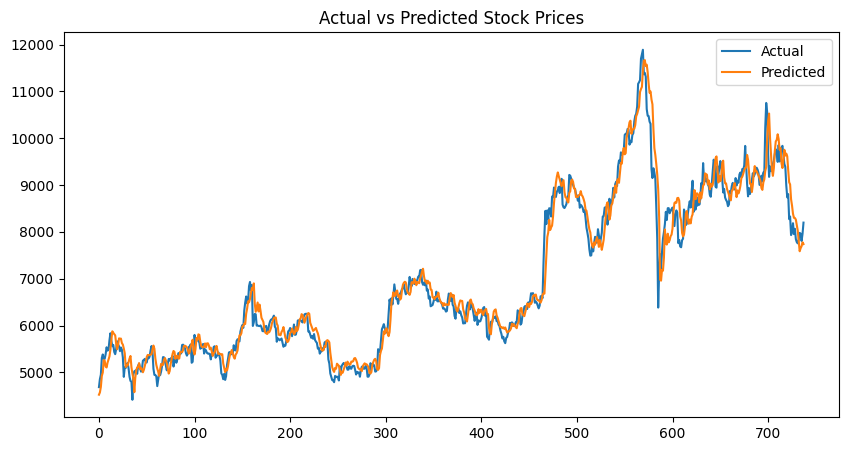

In [ ]:
# Step 9: 誤差評価とプロット
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"Mean Absolute Error: {mae:.2f} JPY")

plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, label="Actual")
plt.plot(y_pred_inverse, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()

In [ ]:
# 予測結果（y_pred_inverse）と実際の株価（y_test_inverse）がある前提

# 平均株価
average_price = y_test_inverse.mean()

# MAE（絶対誤差の平均）
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

# 誤差率（％）
error_rate = (mae / average_price) * 100

print(f"平均株価: {average_price:.2f} JPY")
print(f"Mean Absolute Error: {mae:.2f} JPY")
print(f"誤差率: {error_rate:.2f}%")

平均株価: 6953.16 JPY
Mean Absolute Error: 230.56 JPY
誤差率: 3.32%


# 「上がる or 下がる」分類

[*********************100%***********************]  1 of 1 completed


Accuracy: 53.04%
              precision    recall  f1-score   support

           0       0.51      0.65      0.57       241
           1       0.55      0.42      0.48       253

    accuracy                           0.53       494
   macro avg       0.53      0.53      0.53       494
weighted avg       0.54      0.53      0.52       494

Confusion Matrix:
[[156  85]
 [147 106]]


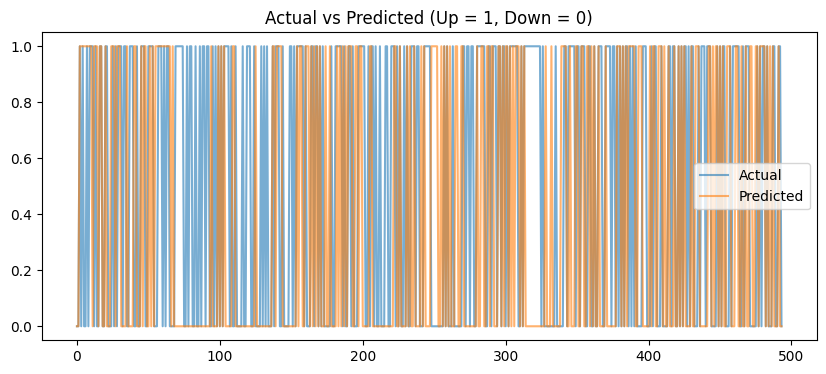

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. 株価データを取得（ソフトバンクグループ）
df = yf.download("9984.T", start="2015-01-01", end="2025-03-25")
df = df.rename(columns={"Adj Close": "Close"})

# 2. 特徴量を作成
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

# 3. ターゲット列作成（翌日株価が上がるなら1、下がるなら0）
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

# 4. 欠損値を除外
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
data = df[features + ["Target"]].dropna()

X = data[features]
y = data["Target"]

# 5. 訓練・テストに分割（80:20）
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 6. モデル学習（ランダムフォレスト）
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 7. 予測と評価
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8. 可視化
plt.figure(figsize=(10, 4))
plt.plot(y_test.reset_index(drop=True), label="Actual", alpha=0.6)
plt.plot(y_pred, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted (Up = 1, Down = 0)")
plt.legend()
plt.show()
